$\newcommand{\bkt}[1]{\left( #1 \right)}$

# Initial Value Problems

Consider the first-order ordinary differential equation of the form

$$\dfrac{dy}{dt} = f\bkt{y,t} \,\,\,\,\, y(0) = y_0$$

We would like to find $y(t)$. The aim of all numerical methods for solution of this differential equation is to obtain the solution at time $t_{n+1}=t_n + \Delta t$, given the solution for $0 \leq t \leq t_n$. This process, of course, continues; i.e., once $y_{n+1} = y \bkt{t_{n+1}}$ is obtained, then $y_{n+2}$ and so on.

We begin by considering the Taylor series based methods. Let's expand the solution at $t_{n+1}$ about the solution at $t_n$

$$y_{n+1} = y_n + h y_n' + \dfrac{h^2}2 y_n'' + \dfrac{h^3}{6} y_n''' + \cdots$$
where $h=\Delta t$. From the differential equation, we have

$$y_n' = f\bkt{y_n,t_n}$$

which can be substituted in the second term. We can, in principle drop the higher order terms and get a second order approximation to $y_{n+1}$ using $y_n$. We can get higher order approximations to $y_{n+1}$ by making use of the fact that
$$y_n'' = \dfrac{df}{dt} = \dfrac{\partial f}{\partial t} + \dfrac{\partial f}{\partial y} \dfrac{dy}{dt} = f_t + ff_y$$

# Euler Method

$$y_{n+1} = y_n + h f\bkt{y_n,t_n}$$

Locally, this method is $\mathcal{O}\bkt{\bkt{\Delta t}^2}$. Globally, it is $\mathcal{O}\bkt{\Delta t}$. This is a single step method, i.e., $y_{n+1}$ only depends on $y_n$. In contrast, multistep methods are where $y_{n+1}$ depends on $y_n,y_{n-1}$ and so on.

Further, this is an *explicit method*, i.e., the function $f$ only needs to be evaluated at already known values, i.e., at $y_n,y_{n-1},\ldots$. In contrast, implicit methods are those, where the function $f$ gets evaluated at $y_{n+1}$.

We will look at multi-step methods and the difference between explicit and implicit methods.

# Numerical Stability

It is quite possible that the numerical solution grows unbounded even thought the solution to the underlying differential equation is bounded and well behaved. In the case of stability, we look for constraints in our parameters for which given that the exact solution to the underlying differential equation is bounded, the numerical solution also remains bounded.

Three classes of numerical methods:

*Unstable numerical schemes*: Numerical solution blows up with any choice of time stepping. Clearly, these are useless.

*Conditionally stable numerical schemes*: For certain choice of time stepping, numerical solution remains bounded.

*Unconditionally stable numerical schemes*: For any choice of time stepping, numerical solution remains bounded.

# Linear stability analysis

Expanding $f(y,t)$ about $y_0,t_0$, we have
$$f(y,t) = f(y_0,t_0) + \bkt{t-t_0} \dfrac{\partial f}{\partial t} + \bkt{y-y_0} \dfrac{\partial f}{\partial y} + \cdots$$

For the solution to be bounded, we see that only the linear term in $y$ is the most important term to study. Hence, we will be looking at the model problem $y' = \lambda y$. Note that any linear second order differential equation can also be converted into a first order linear equation. For instance,
$$y'' + by' + c y = 0$$ can be rewritten as follows. Let
$$z = \begin{bmatrix} y\\ y' \end{bmatrix}$$
Then
$$z' = \begin{bmatrix} y'\\ y'' \end{bmatrix} = \begin{bmatrix}0 & 1\\-c & -b\end{bmatrix}\begin{bmatrix}y\\y' \end{bmatrix} = A z$$
Assuming $A$ is diagonalizable, we see that $A = S \Lambda S^{-1}$, this gives us
$$\bkt{S^{-1}z}' = \Lambda \bkt{S^{-1}z}$$
where $\Lambda$ is a diagonal matrix. If $b=0$ and $c=\omega^2$, we have a harmonic oscillator, and the eigenvalues are $\pm i \omega$.

Hence, for the sake of analyzing stability, we will be looking at the model problem of the form
$$y' = \lambda y$$
where $\text{Real}\bkt{\lambda} \leq 0$.

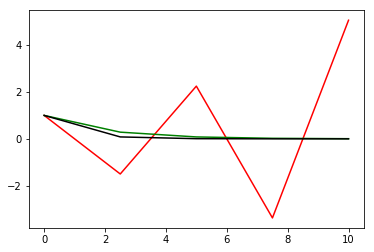

In [40]:
import numpy as np;
# Solve y'+lambda y = 0 with y(0) = 1 till solution decays to 1e-10;
L = 1;
y_init = 1;
t = [0];
y_e = [y_init];
y_i = [y_init];
y_exact= [y_init];
tol = 1e-10;
dt = 2.5;
max_t = 10;
while (t[-1]<max_t):
    t.append(t[-1]+dt);
    y_next = y_e[-1]-L*y_e[-1]*dt;
    y_e.append(y_next);
    y_i.append(y_i[-1]/(1+L*dt));
    y_exact.append(y_init*np.exp(-L*t[-1]))
import matplotlib.pyplot as plt;
plt.plot(t,y_e,'r');
plt.plot(t,y_i,'g');
plt.plot(t,y_exact,'k');
plt.show();